In [20]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# <img width = '600px' src="example.jpeg">

https://stackoverflow.com/questions/20831612/getting-the-bounding-box-of-the-recognized-words-using-python-tesseract

In [22]:
# d = pytesseract.image_to_data('example.jpeg', lang='rus', config='--psm 6')

In [27]:
img = cv2.imread('0004.jpeg')

d = pytesseract.image_to_data(img, lang='rus', output_type=Output.DICT)
bboxes = []

n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    if d['level'][i] == 4:
        #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        bboxes.append([x, y, w, h])
# cv2.imwrite('resexample.jpeg', img)

 crop image to bounding box
 
 https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

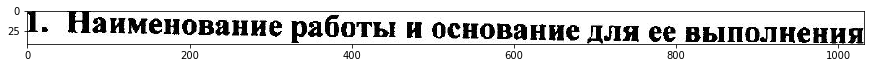

In [36]:
x, y, w, h = bboxes[0]
crop_img = img[y:y+h, x:x+w]
plt.figure(figsize=(15, 15))
plt.imshow(crop_img)
plt.show()

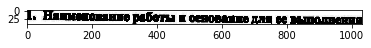

In [37]:
kernel = np.ones((4, 4),np.uint8)
erosion = cv2.erode(crop_img, kernel, iterations = 1)
plt.imshow(erosion)
plt.show()

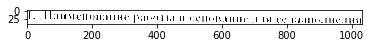

In [38]:
dilation = cv2.dilate(crop_img, kernel, iterations = 1)
plt.imshow(dilation)
plt.show()

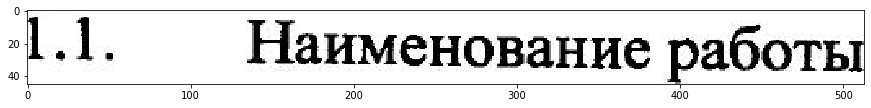

In [39]:
x, y, w, h = bboxes[1]
crop_img = img[y:y+h, x:x+w]
plt.figure(figsize=(15, 15))
plt.imshow(crop_img)
plt.show()

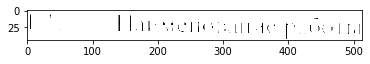

In [40]:
dilation = cv2.dilate(crop_img, kernel, iterations = 1)
plt.imshow(dilation)
plt.show()

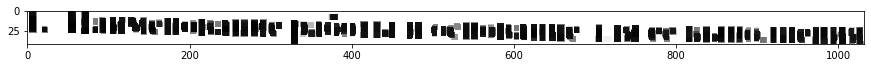

In [53]:
x, y, w, h = bboxes[0]
crop_img = img[y:y+h, x:x+w]
plt.figure(figsize=(15, 15))
kernel = np.ones((5, 5),np.uint8)
dilation = cv2.dilate(crop_img, kernel, iterations = 1)
kernel = np.ones((7, 7),np.uint8)
erosion = cv2.erode(dilation, kernel, iterations = 1)
plt.imshow(erosion)
plt.show()

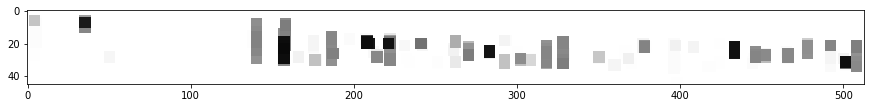

In [54]:
x, y, w, h = bboxes[1]
crop_img = img[y:y+h, x:x+w]
plt.figure(figsize=(15, 15))
kernel = np.ones((5, 5),np.uint8)
dilation = cv2.dilate(crop_img, kernel, iterations = 1)
kernel = np.ones((7, 7),np.uint8)
erosion = cv2.erode(dilation, kernel, iterations = 1)
plt.imshow(erosion)
plt.show()

mean color of bbox

https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

In [6]:
avg_color_per_row = np.average(crop_img, axis=0)
avg_color = np.average(avg_color_per_row, axis=0)
avg_color

array([209.06384994, 209.06384994, 209.06384994])

In [8]:
d = pytesseract.image_to_data('example.jpeg', lang='rus')
print(d)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1653	2339	-1	
2	1	1	0	0	0	1172	108	364	29	-1	
3	1	1	1	0	0	1172	108	364	29	-1	
4	1	1	1	1	0	1172	108	364	29	-1	
5	1	1	1	1	1	1172	108	95	29	75	РДЭО
5	1	1	1	1	2	1280	108	256	23	91	1.1.2.03.0910-2012
2	1	2	0	0	0	237	184	1300	1697	-1	
3	1	2	1	0	0	238	184	1298	162	-1	
4	1	2	1	1	0	340	184	1195	35	-1	
5	1	2	1	1	1	340	184	18	27	96	4
5	1	2	1	1	2	388	184	63	34	92	Для
5	1	2	1	1	3	508	192	143	27	89	тушения
5	1	2	1	1	4	709	192	141	27	92	пожаров
5	1	2	1	1	5	909	192	177	27	92	различных
5	1	2	1	1	6	1143	192	127	19	87	классов
5	1	2	1	1	7	1329	192	206	27	96	порошковые
4	1	2	1	2	0	238	247	1298	36	-1	
5	1	2	1	2	1	238	255	233	28	96	огнетушители
5	1	2	1	2	2	498	255	131	23	96	должны
5	1	2	1	2	3	657	255	96	20	95	иметь
5	1	2	1	2	4	782	255	292	28	95	соответствующие
5	1	2	1	2	5	1101	255	123	28	96	заряды:
5	1	2	1	2	6	1254	256	57	22	95	для
5	1	2	1	2	7	1338	255	107	20	95	класса
5	1	2	1	2	8	1470	247	29	27	92	А
5	1	2	1	2	

In [4]:
import numpy as np
from pytesseract import Output

In [5]:
# проверка, что box1 находится внутри box2
def is_box_in(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    return (x1 >= x2) and (y1 >= y2) and (x1 + w1 <= x2 + w2) and (y1 + h1 <= y2 + h2)

In [5]:
img = cv2.imread('example.jpeg')
d = pytesseract.image_to_data(img, lang='rus', output_type=Output.DICT)

https://tesseract-ocr.github.io/tessapi/5.x/a01818.html


https://tesserwrap.readthedocs.io/en/latest/

In [6]:
# проверка, что box1 находится внутри box2
def is_box_in(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    return (x1 >= x2) and (y1 >= y2) and (x1 + w1 <= x2 + w2) and (y1 + h1 <= y2 + h2)

In [7]:
boxes = []
for i in range(len(d['level'])):
    if d['level'][i] == 4: # bounding box of text line
        box = {'text': '', 'bbox': [d['left'][i], 
               d['top'][i], d['width'][i], d['height'][i]]}
        boxes.append(box)
boxes # norm with width of the page

[{'text': '', 'bbox': [1172, 108, 364, 29]},
 {'text': '', 'bbox': [340, 184, 1195, 35]},
 {'text': '', 'bbox': [238, 247, 1298, 36]},
 {'text': '', 'bbox': [238, 310, 1209, 36]},
 {'text': '', 'bbox': [342, 372, 1195, 37]},
 {'text': '', 'bbox': [238, 436, 1298, 36]},
 {'text': '', 'bbox': [238, 507, 407, 28]},
 {'text': '', 'bbox': [341, 564, 1192, 35]},
 {'text': '', 'bbox': [239, 627, 1279, 36]},
 {'text': '', 'bbox': [341, 692, 1191, 35]},
 {'text': '', 'bbox': [239, 764, 1248, 27]},
 {'text': '', 'bbox': [341, 820, 1193, 35]},
 {'text': '', 'bbox': [237, 885, 1296, 34]},
 {'text': '', 'bbox': [238, 947, 1294, 36]},
 {'text': '', 'bbox': [239, 1011, 1293, 36]},
 {'text': '', 'bbox': [239, 1075, 1294, 36]},
 {'text': '', 'bbox': [238, 1139, 1295, 36]},
 {'text': '', 'bbox': [239, 1203, 1292, 36]},
 {'text': '', 'bbox': [239, 1267, 1295, 36]},
 {'text': '', 'bbox': [237, 1332, 616, 36]},
 {'text': '', 'bbox': [342, 1396, 1191, 36]},
 {'text': '', 'bbox': [238, 1462, 1294, 34]},
 {'t

In [9]:
for i in range(len(d['level'])):
    if d['level'][i] == 5: # bounding box of some word
        box = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
        for j in range(len(boxes)):
            if is_box_in(box, boxes[j]['bbox']):
                if boxes[j]['text'] != '':
                    boxes[j]['text'] += ' '
                boxes[j]['text'] += d['text'][i]
boxes

[{'text': 'РДЭО 1.1.2.03.0910-2012', 'bbox': [1172, 108, 364, 29]},
 {'text': '4 Для тушения пожаров различных классов порошковые',
  'bbox': [340, 184, 1195, 35]},
 {'text': 'огнетушители должны иметь соответствующие заряды: для класса А -',
  'bbox': [238, 247, 1298, 36]},
 {'text': 'порошок АВС(Е); для классов В, Си (Е) - ВС(Е) или АВС(Е) и класса О.',
  'bbox': [238, 310, 1209, 36]},
 {'text': '5 На объекте должно быть определено лицо, ответственное за',
  'bbox': [342, 372, 1195, 37]},
 {'text': 'приобретение, ремонт, сохранность и готовность к действию первичных',
  'bbox': [238, 436, 1298, 36]},
 {'text': 'средств пожаротушения.', 'bbox': [238, 507, 407, 28]},
 {'text': 'Учет проверки наличия и состояния первичных средств',
  'bbox': [341, 564, 1192, 35]},
 {'text': 'пожаротушения следует вести в специальном журнале произвольной формы.',
  'bbox': [239, 627, 1279, 36]},
 {'text': '6 Огнетушители должны всегда содержаться в исправном состоянии,',
  'bbox': [341, 692, 1191, 35]},


In [10]:
h0 = img.shape[0]
w0 = img.shape[1]

In [11]:
h0, w0

(2339, 1653)

In [1]:
from pdf2text import pdf2text
pdf2text('example.jpeg')

['РДЭО 1.1.2.03.0910-2012',
 '',
 '4 Для тушения пожаров различных классов порошковые',
 'огнетушители должны иметь соответствующие заряды: для класса А -',
 'порошок АВС(Е); для классов В, С и (Е) - ВС(Е) или АВС(Ё) и класса О.',
 '',
 '5 На объекте должно быть определено лицо, ответственное за',
 'приобретение, ремонт, сохранность и готовность к действию первичных',
 'средств пожаротушения.',
 '',
 'Учет проверки наличия и состояния первичных средств',
 'пожаротушения следует вести в специальном журнале произвольной формы.',
 '',
 '6 Огнетушители должны всегда содержаться в исправном состоянии,',
 'периодически осматриваться, проверяться и своевременно перезаряжаться.',
 '',
 '7 В производственных и складских зданиях и сооружениях, а также на',
 'территории строительной площадки в местах, определенных',
 'стройгенпланом, должны быть размещены пожарные щиты со следующим',
 'минимальным набором ручного пожарного инструмента и огнетушителями,',
 'шт.: лом - 1; лопата штыковая - 1; лопат

In [1]:
import os

In [2]:
files = os.listdir('/Users/anastasiabogatenkova/Downloads/ParagraphLabelerApp-master/data/images')

In [4]:
files.remove('.DS_Store')
files

['1346.jpeg',
 '1311.jpeg',
 '1254.jpeg',
 '1307.jpeg',
 '1452.jpeg',
 '1393.jpeg',
 '1405.jpeg',
 '1385.jpeg',
 '1444.jpeg',
 '1258.jpeg',
 '1262.jpeg',
 '1235.jpeg',
 '1366.jpeg',
 '1448.jpeg',
 '1274.jpeg',
 '1331.jpeg',
 '1275.jpeg',
 '1222.jpeg',
 '1371.jpeg',
 '1326.jpeg',
 '1218.jpeg',
 '1424.jpeg',
 '1432.jpeg',
 '1279.jpeg',
 '1296.jpeg',
 '1412.jpeg',
 '1238.jpeg',
 '1428.jpeg',
 '1351.jpeg',
 '1306.jpeg',
 '1435.jpeg',
 '1264.jpeg',
 '1321.jpeg',
 '1419.jpeg',
 '1360.jpeg',
 '1272.jpeg',
 '1337.jpeg',
 '1340.jpeg',
 '1439.jpeg',
 '1301.jpeg',
 '1244.jpeg',
 '1268.jpeg',
 '1287.jpeg',
 '1383.jpeg',
 '1291.jpeg',
 '1443.jpeg',
 '1414.jpeg',
 '1228.jpeg',
 '1245.jpeg',
 '1253.jpeg',
 '1341.jpeg',
 '1336.jpeg',
 '1418.jpeg',
 '1265.jpeg',
 '1320.jpeg',
 '1459.jpeg',
 '1335.jpeg',
 '1362.jpeg',
 '1227.jpeg',
 '1231.jpeg',
 '1323.jpeg',
 '1319.jpeg',
 '1460.jpeg',
 '1397.jpeg',
 '1456.jpeg',
 '1285.jpeg',
 '1211.jpeg',
 '1303.jpeg',
 '1315.jpeg',
 '1343.jpeg',
 '1314.jpeg',
 '1247

In [1]:
import re

In [13]:
expr = re.compile(r'.*\.')
line = ".jgkjgkjgk."
match = expr.fullmatch(line)

In [8]:
dir(re.Match)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'end',
 'endpos',
 'expand',
 'group',
 'groupdict',
 'groups',
 'lastgroup',
 'lastindex',
 'pos',
 're',
 'regs',
 'span',
 'start',
 'string']

In [15]:
len(match.group()) == len(line)

True

In [19]:
re1 = re.compile(r'.*;')
re2 = re.compile(r'.*,')
re3 = re.compile(r'.*[\wа-яА-Я]')

print(re1.fullmatch('hkgjkg;jhvjhvg;jgjh;'))
print(re2.fullmatch('hgfhgfhgf,jkhk'))
print(re3.fullmatch('kjhgkjhghjgfhc9'))

<re.Match object; span=(0, 20), match='hkgjkg;jhvjhvg;jgjh;'>
None
<re.Match object; span=(0, 15), match='kjhgkjhghjgfhc9'>


In [18]:
RE_LIST1 = re.compile(r'\d+(\.\d+)+\D') # 1.1.1
RE_LIST2 = re.compile(r'\d+[\)|\.]\s') # 1) 1.

In [20]:
int(RE_LIST1.match('1.1.2 1.1.1').group()[-2])

2

In [11]:
int(RE_LIST2.match('1. ').group()[:-2])

1

In [21]:
list(range(6, -1, -1))

[6, 5, 4, 3, 2, 1, 0]